<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


# Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="#Question-1:-Use-yfinance-to-Extract-Stock-Data-(Tesla)">Question 1: Use yfinance to Extract Stock Data (Tesla)</a>
2.  <a href="#Question-2:-Use-Webscraping-to-Extract-Tesla-Revenue-Data">Question 2: Use Webscraping to Extract Tesla Revenue Data</a>
3.  <a href="#Question-3:-Use-yfinance-to-Extract-Stock-Data-(GameStop)">Question 3: Use yfinance to Extract Stock Data (GameStop)</a>
4.  <a href="#Question-4:-Use-Webscraping-to-Extract-GameStop-Revenue-Data">Question 4: Use Webscraping to Extract GameStop Revenue Data</a>
5.  <a href="#Question-5:-Plot-Tesla-Stock-Graph">Question 5: Plot Tesla Stock Graph</a>
6.  <a href="#Question-6:-Plot-GameStop-Stock-Graph">Question 6: Plot GameStop Stock Graph</a>
    
</font>
</div>

!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly
!pip install html5lib
!pip install 

In [31]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Question 1: Use yfinance to Extract Stock Data (Tesla)

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Tesla and the ticker symbol is `TSLA`.

In [8]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` to get information for the maximum amount of time.

In [9]:
tesla_data = tesla.history(period="max")

Reset the index using the `reset_index(inplace=True)` function on the `tesla_data` DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function.

In [10]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the `tesla_revenue` dataframe using the `tail` function.

In [91]:
url = 'https://finance.yahoo.com/quote/TSLA/history?p=TSLA'
html_data = requests.get(url).text

In [92]:
soup = BeautifulSoup(html_data, 'html5lib')

In [93]:
title = soup.find('title').string
title

'Yahoo'

In [89]:
tesla_df = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"])

tbody = soup.find("tbody")

if tbody:
    for row_num, row in enumerate(tbody.find_all("tr"), start=1):
        if row_num == 1:
            # Skip the header row
            continue

        col = row.find_all("td")

        # Print information about the row and columns
        print(f"Processing row {row_num}, Number of columns: {len(col)}")

        # Check if the number of columns is sufficient
        if len(col) >= 7:
            date = col[0].text
            Open = col[1].text
            high = col[2].text
            low = col[3].text
            close = col[4].text
            adj_close = col[5].text
            volume = col[6].text

            tesla_df = tesla_df.append(
                {"Date": date, "Open": Open, "High": high, "Low": low, "Close": close, "Adj Close": adj_close,
                 "Volume": volume},
                ignore_index=True
            )
        else:
            print(f"Skipping row {row_num} with insufficient columns")

else:
    print("No tbody found in the HTML.")
    
# Print the final DataFrame outside the loop
print(tesla_df)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [86]:
tesla_df

,Date,Open,High,Low,Close,Adj Close,Volume


In [90]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-us">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta charset="utf-8"/>
  <title>
   Yahoo
  </title>
  <meta content="width=device-width,initial-scale=1,minimal-ui" name="viewport"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <style>
   html {
      height: 100%;
  }
  body {
      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;
      background-size: cover;
      height: 100%;
      text-align: center;
      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;
  }
  table {
      height: 100%;
      width: 100%;
      table-layout: fixed;
      border-collapse: collapse;
      border-spacing: 0;
      border: none;
  }
  h1 {
      font-size: 42px;
      font-weight: 400;
      color: #400090;
  }
  p {
      color: #1A1A1A;
  }
  #message-1 {
      font-weight: bold;
      margin: 0;
  }
  #message-2 {
      display: inline-b

In [94]:
tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

IndexError: list index out of range

In [95]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [96]:
tesla_revenue.tail()

,Date,Revenue


# Question 3: Use yfinance to Extract Stock Data (GameStop)

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is GameStop and the ticker symbol is `GME`.

In [14]:
GameStop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` to get information for the maximum amount of time.

In [15]:
gme_data = GameStop.history(period="max")

Reset the index using the `reset_index(inplace=True)` function on the `gme_data` DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function.

In [16]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GameStop Revenue Data

# Question 5: Plot Tesla Stock Graph

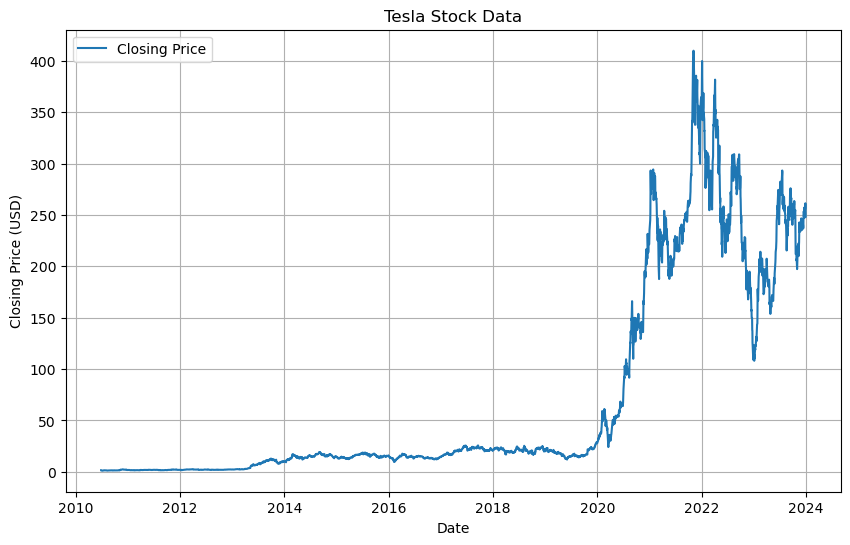

In [65]:
import matplotlib.pyplot as plt

# Function to make a graph
def tesla_graph(data, title="Stock Data"):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Closing Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Obtain Tesla stock data
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

tesla_graph(tesla_data, title='Tesla Stock Data')

# Question 6: Plot GameStop Stock Graph

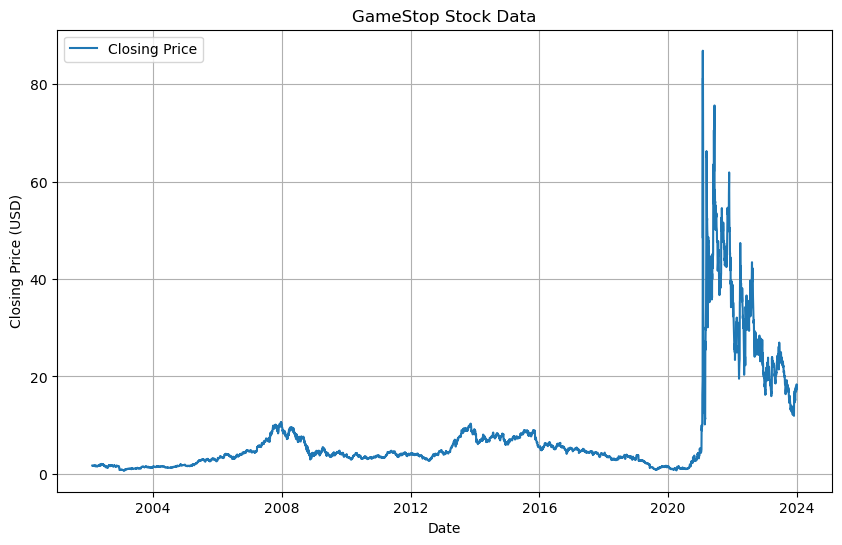

In [62]:
import matplotlib.pyplot as plt

# Function to make a graph
def gme_graph(data, title="Stock Data"):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Closing Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Obtain GameStop stock data
GameStop = yf.Ticker('GME')
gme_data = GameStop.history(period="max")
gme_data.reset_index(inplace=True)

gme_graph(gme_data, title='GameStop Stock Data')